In [1]:
from astropy.io import fits
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from photutils.isophote import EllipseGeometry
from photutils.isophote import Ellipse
from photutils import EllipticalAperture
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import HistEqStretch, LogStretch
import time
from scipy import ndimage
import matplotlib.patches as patches
from photutils.isophote import build_ellipse_model

plt.style.use('classic')
plt.rc('font', family='Times New Roman')

In [75]:
path_bulge = 'bulge.fits'
path_disk = 'disk.fits'

In [87]:
bulge = fits.getdata(path_bulge)
disk = fits.getdata(path_disk)
bulge_disk = bulge + disk

In [113]:
# noisy = bulge_disk + bulge_disk/10 * np.random.normal(loc=0.0, scale=1, size=bulge_disk.shape)

In [115]:
# fits.writeto('noisy.fits', noisy, overwrite=True)

In [116]:
# !open noisy.fits

In [77]:
DIM = disk.shape[0]
xcen = int(DIM/2)
ycen = xcen

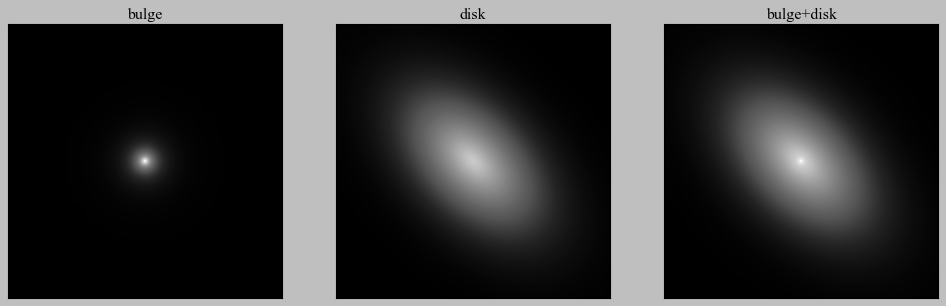

In [100]:
plt.figure(figsize=(15, 5))
vmax = bulge[ycen, xcen]
plt.subplot(131)
norm = ImageNormalize(stretch=LogStretch(a=200), vmin=0, vmax=vmax)
plt.imshow(bulge, origin='lower', cmap='Greys_r', norm=norm)
plt.xticks([])
plt.yticks([])
plt.title('bulge')

plt.subplot(132)
norm = ImageNormalize(stretch=LogStretch(a=200), vmin=0, vmax=vmax)
plt.imshow(disk, origin='lower', cmap='Greys_r', norm=norm)
plt.xticks([])
plt.yticks([])
plt.title('disk')

plt.subplot(133)
norm = ImageNormalize(stretch=LogStretch(a=200), vmin=0, vmax=vmax)
plt.imshow(bulge_disk, origin='lower', cmap='Greys_r', norm=norm)
plt.xticks([])
plt.yticks([])
plt.title('bulge+disk')
plt.savefig('models.png', bbox_inches='tight')

In [56]:
time_start = time.time()
geometry = EllipseGeometry(xcen, ycen, 10, 0, 0)

ellipse = Ellipse(bulge, geometry)

iso_bul = ellipse.fit_image(fix_center=True, fix_pa=False, fix_eps=False, 
    minsma=1, maxsma=DIM/2*1.35, step=0.15, maxgerr=1)

time_end = time.time()
print('totally cost: ',int(time_end-time_start), 'second')

totally cost:  5 second


In [80]:
time_start = time.time()
g = EllipseGeometry(xcen, ycen, 10, 0.5, 0)

ellipse = Ellipse(disk, g)

iso_disk = ellipse.fit_image(fix_center=True, fix_pa=False, fix_eps=False, 
    minsma=1, maxsma=DIM/2*1.35, step=0.15, maxgerr=1)

time_end = time.time()
print('totally cost: ',int(time_end-time_start), 'second')

totally cost:  3 second


In [93]:
time_start = time.time()
g = EllipseGeometry(xcen, ycen, 15, 0.1, 135)

ellipse = Ellipse(bulge_disk, g)

iso_all = ellipse.fit_image(fix_center=True, fix_pa=False, fix_eps=False, 
    minsma=1, maxsma=DIM/2*1.35, step=0.15, maxgerr=1)

time_end = time.time()
print('totally cost: ',int(time_end-time_start), 'second')

totally cost:  3 second


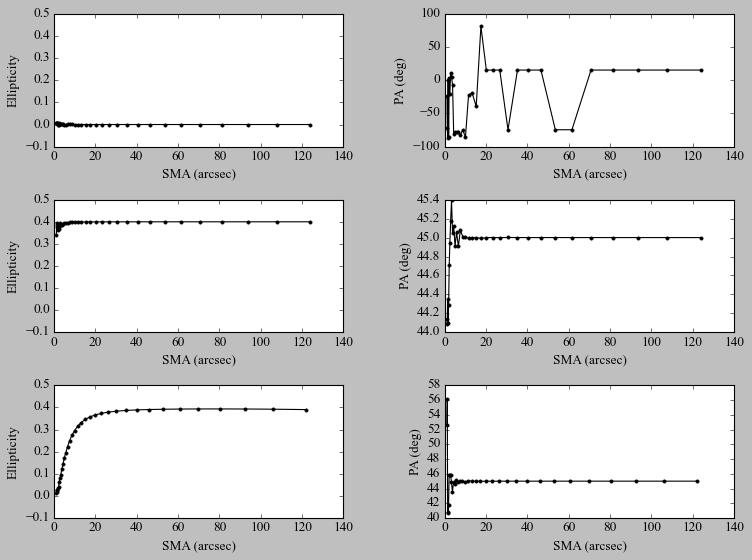

In [101]:
plt.figure(figsize=(10, 7.5))

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.35)

plt.subplot(321)
plt.plot(iso_bul.sma, iso_bul.eps, marker='.', color='black')
plt.xlabel('SMA (arcsec)')
plt.ylabel('Ellipticity')
plt.ylim(-0.1, 0.5)

plt.subplot(322)
plt.plot(iso_bul.sma, iso_bul.pa/np.pi*180.-90, marker='.', color='black')
plt.xlabel('SMA (arcsec)')
plt.ylabel('PA (deg)')
###################################
plt.subplot(323)
plt.plot(iso_disk.sma, iso_disk.eps, marker='.', color='black')
plt.xlabel('SMA (arcsec)')
plt.ylabel('Ellipticity')
plt.ylim(-0.1, 0.5)

plt.subplot(324)
plt.plot(iso_disk.sma, iso_disk.pa/np.pi*180.-90, marker='.', color='black')
plt.xlabel('SMA (arcsec)')
plt.ylabel('PA (deg)')
###################################
plt.subplot(325)
plt.plot(iso_all.sma, iso_all.eps, marker='.', color='black')
plt.xlabel('SMA (arcsec)')
plt.ylabel('Ellipticity')
plt.ylim(-0.1, 0.5)

plt.subplot(326)
plt.plot(iso_all.sma, iso_all.pa/np.pi*180.-90, marker='.', color='black')
plt.xlabel('SMA (arcsec)')
plt.ylabel('PA (deg)')

plt.savefig('iso_models.png', bbox_inches='tight')

In [110]:
!open .